<a href="https://colab.research.google.com/github/SamanZargarzadeh/Automatic-Image-Tagging-for-Fashion-E-commerce/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from scipy.io import loadmat
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D, MaxPooling2D 
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

MessageError: ignored

In [ ]:
from google.colab import drive
drive.mount('gdrive')

In [ ]:
X_train= np.load('/content/gdrive/MyDrive/iMaterialist_CNN/train_set_x.npy')[:500]
#X_test= np.load('/content/gdrive/MyDrive/iMaterialist_CNN/test_set_x.npy')
#X_cv= np.load('/content/gdrive/MyDrive/iMaterialist_CNN/cv_set_x.npy')

y_train= np.load('/content/gdrive/MyDrive/iMaterialist_CNN/train_set_y.npy')[:500]
#y_test= np.load('/content/gdrive/MyDrive/iMaterialist_CNN/test_set_y.npy')
#y_cv= np.load('/content/gdrive/MyDrive/iMaterialist_CNN/cv_set_y.npy')

In [ ]:
print("train X shape: ", X_train.shape) 
print("train y shape: ", y_train.shape)  
#print("test X shape: ", X_test.shape)   
#print("test y shape: ", y_test.shape)   
#print("CV y shape: ", X_cv.shape) 
#print("CV y shape: ", y_cv.shape) 

In [ ]:
model = Sequential([
                    Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='valid', activation = 'relu', input_shape=(300, 200, 3)), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding='valid', activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding='valid', activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    BatchNormalization(),
                    Dropout(0.2),
                    Dense(16, activation = 'relu'),
                    BatchNormalization(),
                    Dropout(0.2),
                    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

In [ ]:
history = model.fit(X_train[..., np.newaxis] , y_train, epochs = 10, batch_size = 50, verbose = 2, validation_split=0.2)


In [ ]:
print(history.history.keys())


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


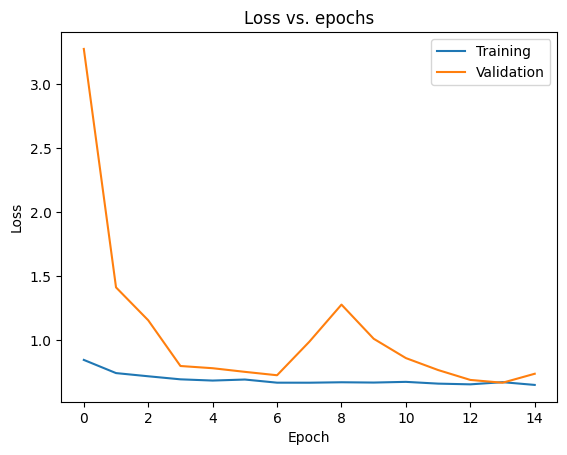

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()